<a href="https://colab.research.google.com/github/ashrafulislam121/ml_algorithms/blob/main/DBSCAN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step-1: Data pre-processing Step

In [48]:
# importing libraries    
import numpy as nm  
import numpy as np  
import matplotlib.pyplot as mtp    
import pandas as pd    

In [49]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Importing the dataset  
dataset = pd.read_csv(path)  

In [51]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
#Extracting Independent Variables --> extracting only 3rd and 4th featurebecause 2d plot to visualize the model, 
# and some features are not required, such as customer_id.
x = dataset.iloc[:, [3, 4]].values

## Step - 2: Right param by elbow method

In [53]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

In DBSCAN, there are 2 main parameters that can be adjusted, 'epsilon' (eps) and 'min_samples'.
A good 'min_samples' number is two times the number of features (columns). We have 2 features so 'min_samples' value will be 4.
To get a reasonable value for epsilon, we will again use the 'elbow method' between % of outlier points and epsilon.
DBSCAN marks points that it thinks are outliers as being in a separate cluster labelled as '-1'.

In [54]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=4)
    dbscan.fit(x)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

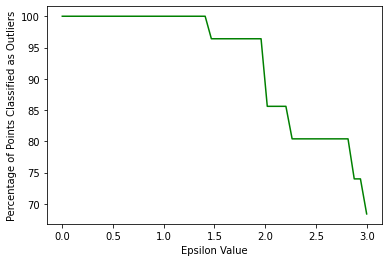

In [55]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' forms somewhere around epsilon = 2.
Let's create a model wil epsilon value 2 and minimum number of samples 4.

## Step-3: Training the DBSCAN clustering model

In [56]:
#training the hierarchical model on dataset  
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=2,min_samples=4,metric='euclidean') 
model=db.fit(x)
y_predict = db.fit_predict(x)

In [57]:
y_predict

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1,  2,  1,  1,  2,  1, -1,  1,  1, -1,  2,  1,
        2, -1, -1, -1, -1, -1,  4,  3,  4,  4,  3,  3,  3,  4,  3,  4,  3,
       -1, -1, -1,  4,  5,  5,  4,  5,  5, -1,  4, -1,  5,  5,  4, -1,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

# Step-4: Visualizing the Clusters

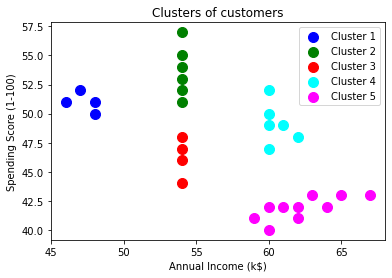

In [58]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
 
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()

We can also observe some points from the above patterns, which are given below:

* Cluster1 shows the customers with average salary and average spending so we can categorize these customers as
* Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful.
* Cluster3 shows the low income and also low spending so they can be categorized as sensible.
* Cluster4 shows the customers with low income with very high spending so they can be categorized as careless.
* Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.

In [59]:
x[y_predict == 0]

array([[46, 51],
       [47, 52],
       [48, 51],
       [48, 50]])

In [60]:
x[y_predict == 0, 0]

array([46, 47, 48, 48])